In [1]:
import pandas as pd
import seaborn as sns

import bandit.environment as env
from bandit.neural_bandit import (
    EpsilonGreedyNeuralBandit,
    EpsilonGreedyNeuralPerArmBandit,
    SoftmaxNeuralBandit,
    SoftmaxNeuralPerArmBandit,
)

sns.set_theme()

In [2]:
import importlib

import bandit

importlib.reload(bandit.neural_bandit)

<module 'bandit.neural_bandit' from '/Users/alextanhongpin/Documents/python/python-bandit/bandit/neural_bandit.py'>

In [6]:
class ContextualEpsilonGreedyNeuralBandit(EpsilonGreedyNeuralBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyNeuralPerArmBandit(EpsilonGreedyNeuralPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralBandit(SoftmaxNeuralBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralPerArmBandit(SoftmaxNeuralPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [7]:
N = 5_000
df = pd.DataFrame(index=range(N))

In [8]:
model = ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=1.0)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 343.18it/s]


In [9]:
model = ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=0.9)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 432.15it/s]


In [10]:
model = ContextualSoftmaxNeuralBandit(env.actions, temperature=0.2)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 412.93it/s]


In [11]:
model = ContextualSoftmaxNeuralBandit(env.actions, temperature=0.5)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 411.55it/s]


In [12]:
model = ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=1.0)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:22<00:00, 220.49it/s]


In [13]:
model = ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=0.9)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:26<00:00, 187.12it/s]


In [14]:
model = ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.2)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:19<00:00, 252.80it/s]


In [15]:
model = ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.5)
total_rewards = 0
avg_rewards = []
for i, ctx in env.random_context(N):
    action = model.predict(ctx)
    reward = env.get_cost(ctx, action)
    model.fit(ctx, action, reward)
    total_rewards += max(0, reward)
    avg_rewards.append(total_rewards / (i + 1))
df[model.__name__] = avg_rewards

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:19<00:00, 260.27it/s]


<Axes: >

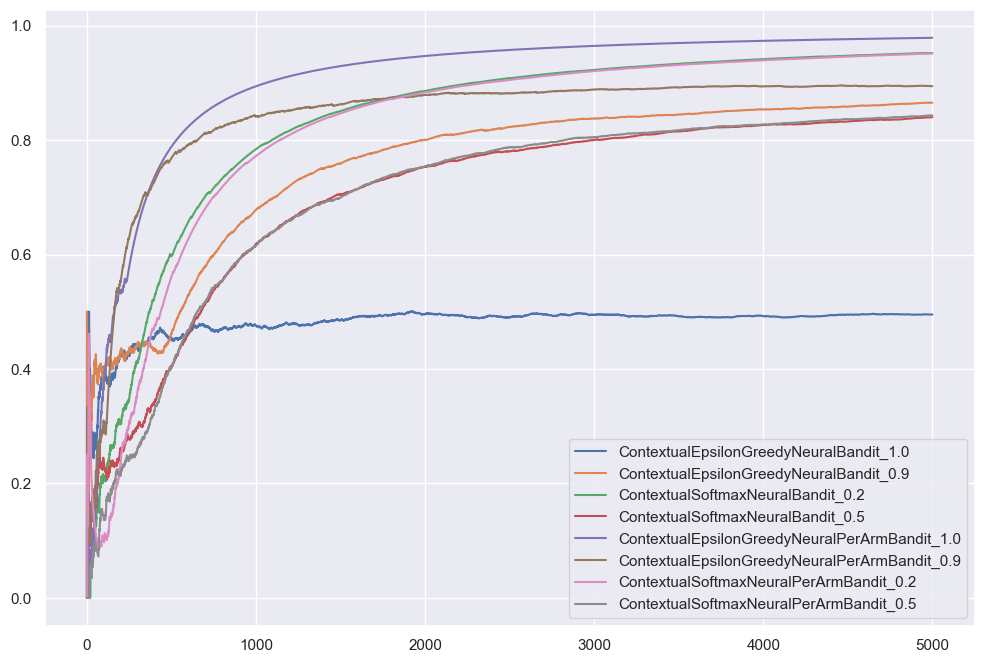

In [33]:
df.plot(figsize=(12, 8))

<Axes: >

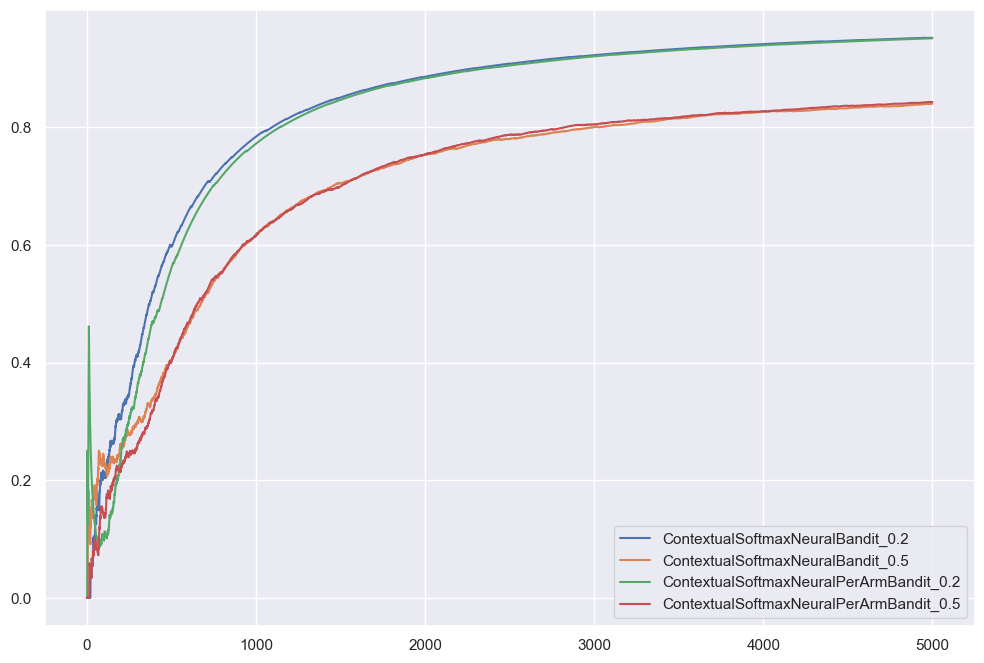

In [39]:
df[[col for col in df.columns if "Softmax" in col]].plot(figsize=(12, 8))

<Axes: >

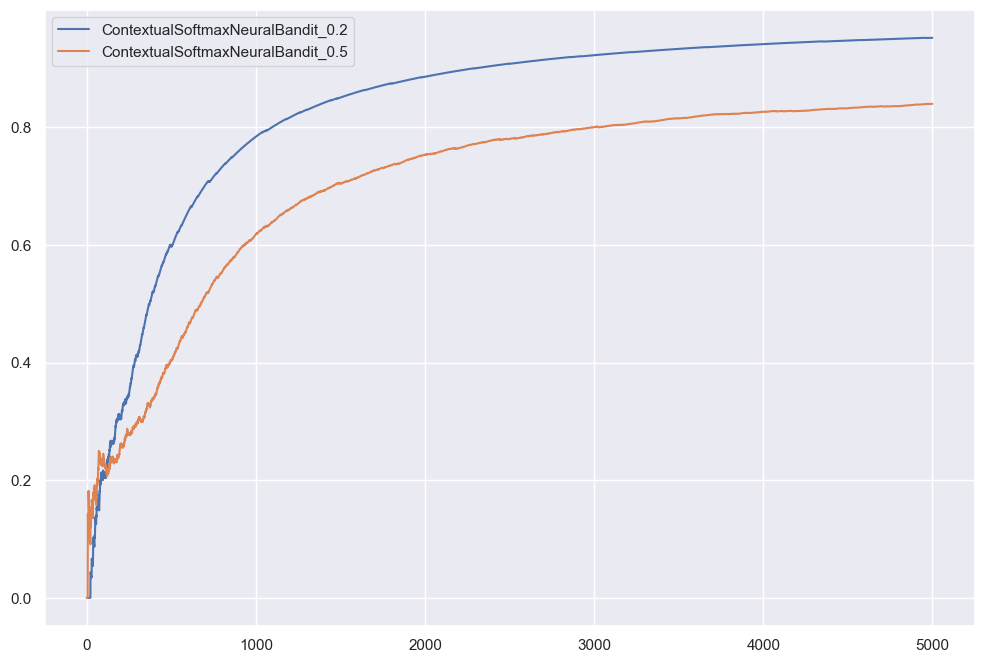

In [40]:
df[[col for col in df.columns if "SoftmaxNeuralBandit" in col]].plot(figsize=(12, 8))

<Axes: >

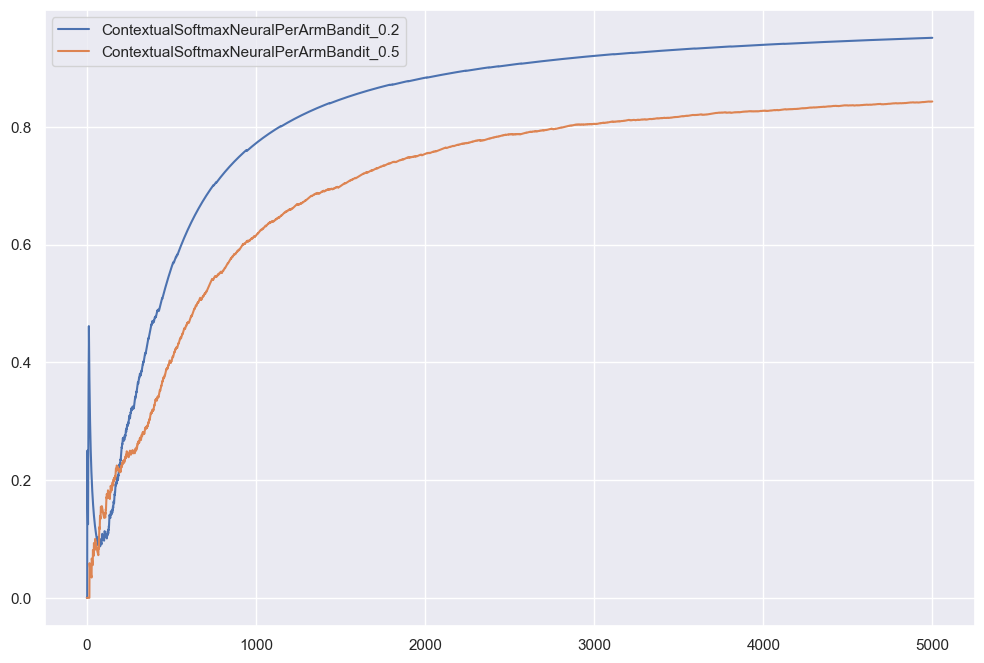

In [41]:
df[[col for col in df.columns if "SoftmaxNeuralPerArmBandit" in col]].plot(figsize=(12, 8))

<Axes: >

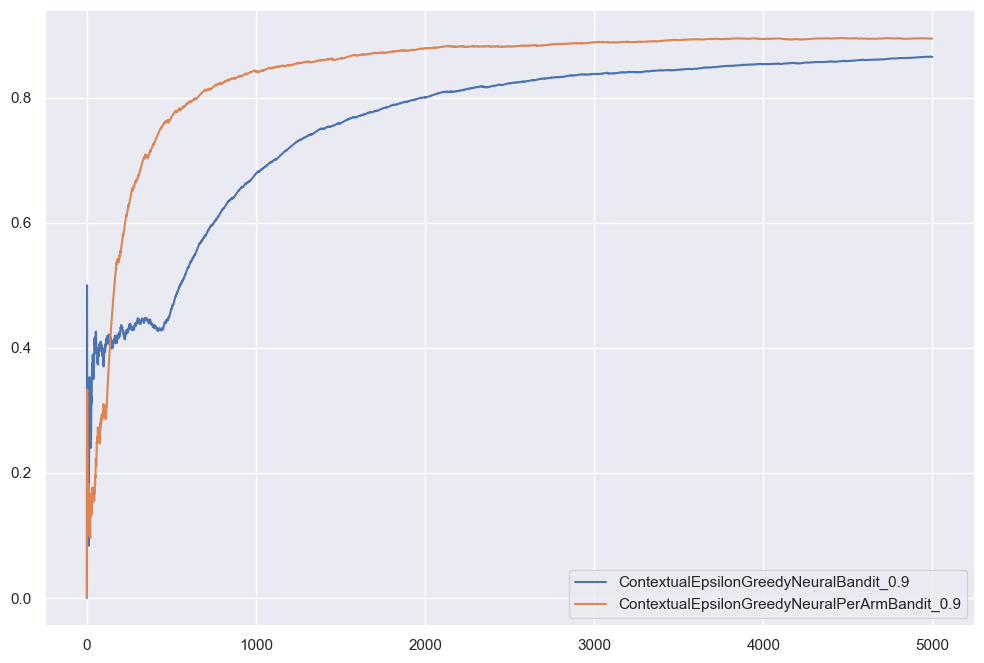

In [37]:
df[[col for col in df.columns if ("Greedy" in col and "0.9" in col)]].plot(
    figsize=(12, 8)
)

<Axes: >

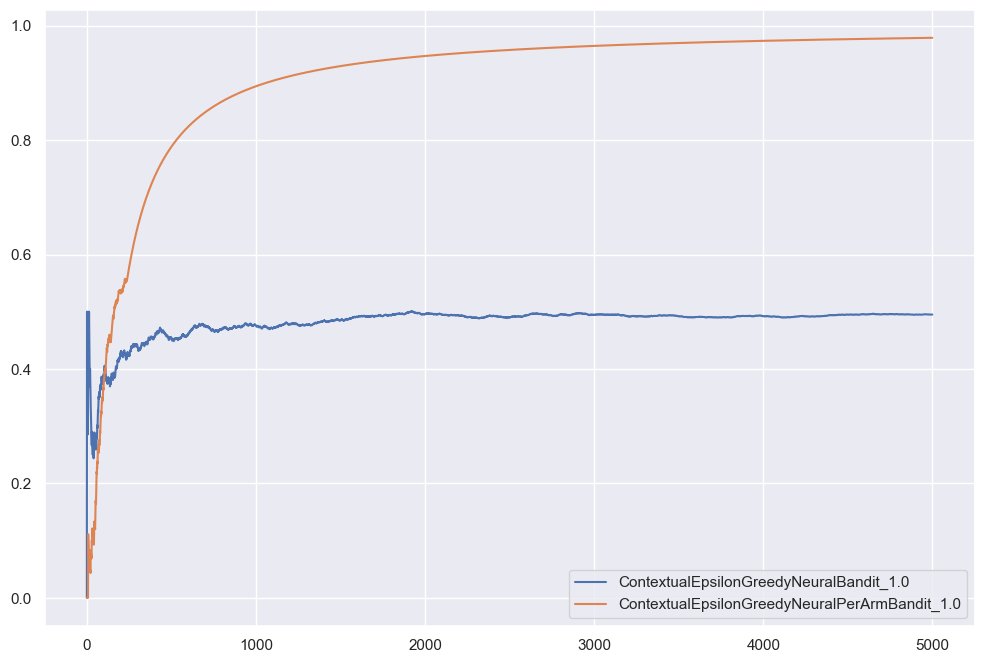

In [38]:
df[[col for col in df.columns if ("Greedy" in col and "1.0" in col)]].plot(
    figsize=(12, 8)
)

<Axes: >

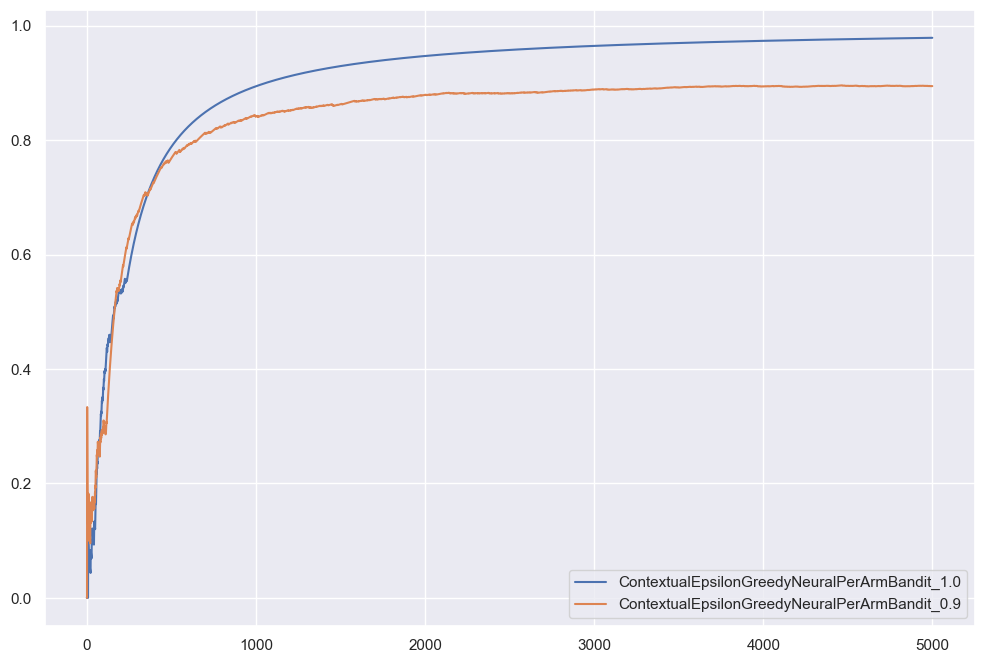

In [36]:
df[[col for col in df.columns if ("GreedyNeuralPer" in col)]].plot(figsize=(12, 8))